# SOCVIZ: Final Project

Link to our data story webpage: https://starostka.github.io/socviz/

In [1144]:
import pandas as pd
import cufflinks as cf
import plotly
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp
%matplotlib inline
import math
from matplotlib import pyplot as plt
from sklearn import model_selection, tree, metrics, ensemble
from sklearn.preprocessing import MinMaxScaler
from bokeh import models, plotting
from bokeh.palettes import Spectral8, Spectral11
import seaborn as sns
import pycountry as pc
from bokeh.models import HoverTool
from bokeh.plotting import figure, show
from bokeh.models import  ColumnDataSource, Legend, LinearAxis, FactorRange
from bokeh.io import output_notebook, show, curdoc
from bokeh.palettes import Spectral6, Category20b
from bokeh.transform import factor_cmap
from bokeh.models import BoxAnnotation
from bokeh.models import Title
from bokeh.layouts import layout
from bokeh.models import Tabs, TabPanel, Range1d

from pandas_geojson import to_geojson

output_notebook()
import bokeh.models as bkm
from bokeh.resources import INLINE
import bokeh.io
from bokeh import *
bokeh.io.output_notebook(INLINE)
import regex as re

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 
init_notebook_mode(connected=True)
cf.go_offline()

Loading BokehJS ...

Loading BokehJS ...

## 1 Motivation

What is your dataset?
> The data used is available at [City of Melbourne open data portal](https://data.melbourne.vic.gov.au/explore/?sort=modified&q=forecast)

Here's a brief statistics for each of the datasets used for this project.

1. [City of Melbourne Jobs Forecasts by Small Area 2021-2041](https://data.melbourne.vic.gov.au/explore/dataset/city-of-melbourne-jobs-forecasts-by-small-area-2020-2040/information/)
    * 585 KB, 9114 rows, 5 cols, geodata: area name, age and gender
3. [City of Melbourne Population Forecasts by Small Area 2021-2041](https://data.melbourne.vic.gov.au/explore/dataset/city-of-melbourne-population-forecasts-by-small-area-2020-2040/information/)
    * 710 KB, 17052 rows, 5 cols, geodata: area name
5. [City of Melbourne Dwellings and Household Forecasts by Small Area 2021-2041](https://data.melbourne.vic.gov.au/explore/dataset/city-of-melbourne-dwellings-and-household-forecasts-by-small-area-2020-2040/information/)
    * 161 KB, 2646 rows, 5 cols, geodata: area name
7. [City of Melbourne Floor Space Forecasts by Small Area 2021-2041](https://data.melbourne.vic.gov.au/explore/dataset/city-of-melbourne-floor-space-forecasts-by-small-area-2020-2040/information/)
    * 834 KB, 9996 rows, 5 cols, geodata: area name
9. [Development Activity Monitor](https://data.melbourne.vic.gov.au/explore/dataset/development-activity-monitor/information/)
    * 328 KB, 1430 rows, 42 cols, geodata: yes
11. [World Demographic](https://data.worldbank.org/)
    * 38 KB, 227 rows, 20 col, geodata: country name

Why did you choose this/these particular dataset(s)?
> We want to show the pictures of the future for Melbourne by applying the city's forecasts data, and provide readers with the insights of the city's future development combining the current development activities, as well as the historical data.

What was your goal for the end user's experience?
> The initiative of this narrative data story is to provide the readers with an opportunity to delve into Melbourne's city life through various data sets, including these aspects:
> - Population and demographic
> - Dwelling and household
> - Employment and jobs
>
> By examining these aspects, the end can see the potential opportunities in the city. The end users should be able to see the future of Melbourne in the next 20 years, both in intuitionistic graphics and interactive data visualizations.

## 2. Basic stats

Write about your choices in data cleaning and preprocessing

**Melbourne Population**

In [1145]:
df_population = pd.read_csv('data/city-of-melbourne-population-forecasts-by-small-area-2020-2040.csv')
df_population.columns

Index(['Geography', 'Year', 'Gender', 'Age', 'Value'], dtype='object')

In [1146]:
print(df_population.Geography.unique())
print(df_population.Year.unique()) 
print(df_population.Age.unique())

['City of Melbourne' 'Carlton' 'Docklands' 'East Melbourne' 'Kensington'
 'Melbourne (CBD)' 'Melbourne (Remainder)' 'North Melbourne' 'Parkville'
 'Port Melbourne' 'South Yarra' 'Southbank' 'West Melbourne (Industrial)'
 'West Melbourne (Residential)']
[2021 2023 2026 2028 2034 2037 2038 2024 2025 2040 2031 2033 2022 2032
 2036 2041 2027 2029 2039 2035 2030]
['Age 0-4' 'Age 5-9' 'Age 10-14' 'Age 15-19' 'Age 20-24' 'Age 25-29'
 'Age 30-34' 'Age 35-39' 'Age 40-44' 'Age 45-49' 'Age 50-54' 'Age 55-59'
 'Age 60-64' 'Age 65-69' 'Age 70-74' 'Age 75-79' 'Age 80-84' 'Age 85+'
 'Average age' 'Total population']


In [1147]:
df_population.describe()

Year          Value
count  17052.000000   16989.000000
mean    2031.000000    1741.591265
std        6.055478    9593.924632
min     2021.000000       0.000000
25%     2026.000000      69.000000
50%     2031.000000     251.000000
75%     2036.000000     867.000000
max     2041.000000  308190.000000

**Melbourne Dwelling and Household**

In [1148]:
df_household = pd.read_csv('data/city-of-melbourne-dwellings-and-household-forecasts-by-small-area-2020-2040.csv')
df_household.columns

Index(['Geography', 'Year', 'Category', 'Households', 'Value'], dtype='object')

In [1149]:
print(df_household.Category.unique())
print(df_household.Households.unique())

['Household type' 'Structural Private Dwellings' 'Household size']
['Group household' 'Couple family with children'
 'Couple family without children' 'Lone person' 'One-parent family'
 'Other family' 'Not applicable' 'Total households']


In [1150]:
df_household.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2646 entries, 0 to 2645
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Geography   2646 non-null   object
 1   Year        2646 non-null   int64 
 2   Category    2646 non-null   object
 3   Households  2646 non-null   object
 4   Value       2646 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 103.5+ KB


**Melbourne Floor Space**

In [1151]:
df_floorspace = pd.read_csv('data/city-of-melbourne-floor-space-forecasts-by-small-area-2020-2040.csv')

In [1152]:
print(df_floorspace.Category.unique())
print(df_floorspace.Geography.unique())
print(df_floorspace['Industry Space Use'].unique())

['Employment floorspace by industry' 'Employment floorspace by space use'
 'Residential floorspace by space use']
['City of Melbourne' 'Carlton' 'Docklands' 'East Melbourne' 'Kensington'
 'Melbourne (CBD)' 'Melbourne (Remainder)' 'North Melbourne' 'Parkville'
 'Port Melbourne' 'South Yarra' 'Southbank' 'West Melbourne (Industrial)'
 'West Melbourne (Residential)']
['Accommodation' 'Admin and support services' 'Agriculture and mining'
 'Arts and recreation services' 'Business services' 'Construction'
 'Education and training' 'Electricity, gas, water and waste services'
 'Finance and insurance' 'Food and beverage services'
 'Health care and social assistance'
 'Information media and telecommunications' 'Manufacturing'
 'Other services' 'Public administration and safety'
 'Real estate services' 'Rental and hiring services' 'Retail trade'
 'Transport, postal and storage' 'Wholesale trade'
 'Accommodation - Commercial' 'Education' 'Entertainment - Hospitality'
 'Entertainment - Other' 'Hea

In [1153]:
df_floorspace.describe()

Year         Value
count  9996.000000  9.996000e+03
mean   2031.000000  4.210271e+05
std       6.055604  1.575079e+06
min    2021.000000  0.000000e+00
25%    2026.000000  5.627750e+03
50%    2031.000000  3.820300e+04
75%    2036.000000  2.054200e+05
max    2041.000000  2.195966e+07

Write a short section that discusses the dataset stats, containing key points/plots from your exploratory data analysis.

**Melbourne Population Forecast**: The data set contains 17052 rows with the categories of Melbourne areas, population age gruops, predicted years and the amount of population. To briefly visualize the trend of population growth in the whole Melbourne, we could see it will be continuesely increse in the next two decades.

<AxesSubplot: xlabel='Year'>

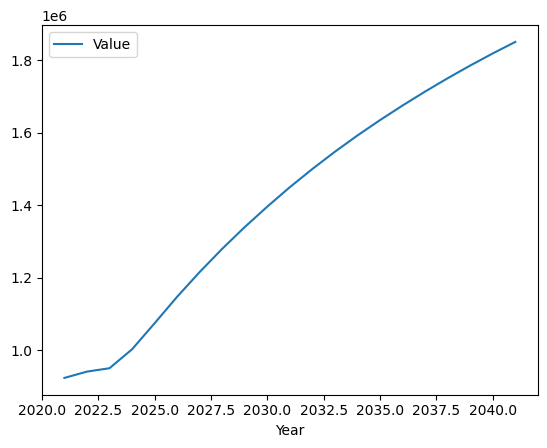

In [1154]:
df_population.groupby(['Year']).sum().plot()

**Melbourne Dwelling and Household**:

<AxesSubplot: ylabel='Households'>

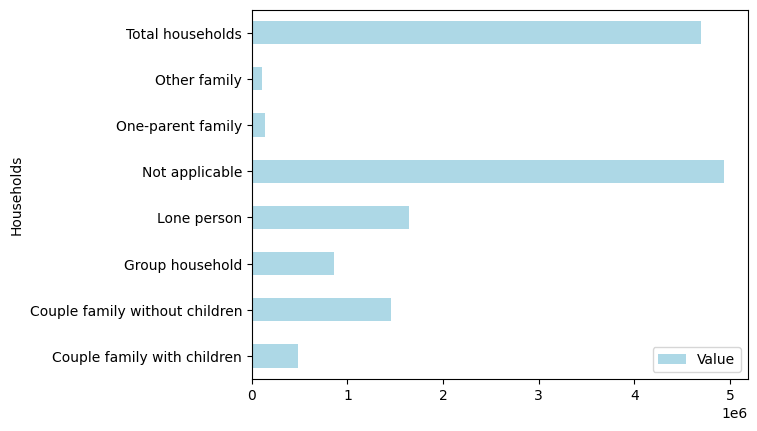

In [1155]:
df_household.groupby(['Households']).sum().plot(kind='barh', y='Value', color='lightblue')

In [1156]:
df_household.Category.value_counts()

Category
Household type                  2058
Structural Private Dwellings     294
Household size                   294
Name: count, dtype: int64

**Melbourne Dwelling, Households and Floor Space**: Let's make a glance of the forecast amount distribution of the location in the near future 2025.

<AxesSubplot: title={'center': 'Floor Space by Small Area in 2025'}, xlabel='Geography'>

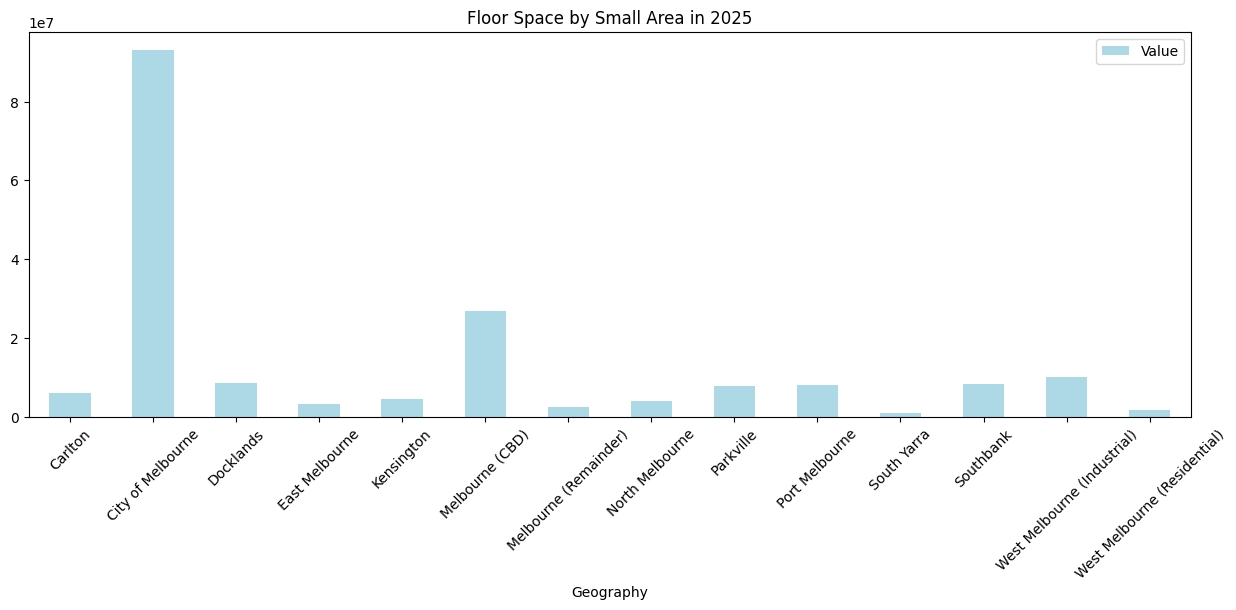

In [1157]:
df_floor2025 = df_floorspace[df_floorspace.Year == 2025]
df_floor2025.groupby('Geography').sum().plot(kind='bar', y='Value', figsize=(15, 5), title='Floor Space by Small Area in 2025', color='lightblue', rot=45)

## 3. Data Analysis

Describe your data analysis and explain what you've learned about the dataset.

If relevant, talk about your machine-learning.

### Population and demographics

In [1158]:
df_population = pd.read_csv('data/city-of-melbourne-population-forecasts-by-small-area-2020-2040.csv')
df_population

Geography  Year          Gender               Age   
0                 City of Melbourne  2021          Female           Age 0-4  \
1                 City of Melbourne  2023          Female           Age 0-4   
2                 City of Melbourne  2026          Female           Age 0-4   
3                 City of Melbourne  2028          Female           Age 0-4   
4                 City of Melbourne  2034          Female           Age 0-4   
...                             ...   ...             ...               ...   
17047   West Melbourne (Industrial)  2040  Not applicable  Total population   
17048   West Melbourne (Industrial)  2041  Not applicable  Total population   
17049  West Melbourne (Residential)  2024  Not applicable  Total population   
17050  West Melbourne (Residential)  2031  Not applicable  Total population   
17051  West Melbourne (Residential)  2040  Not applicable  Total population   

         Value  
0       1943.0  
1       2477.0  
2       3595.0  
3       4083.0  
4       5242.0  
...        ...  
17047      0.0  
17048      0.0  
17049   8345.0  
17050  12716.0  
17051  14824.0  

[17052 rows x 5 columns]

The age groups seems to be a good indicator of the population growth. However the data is not neat so we need to remove the records of 'Total population' and 'Average age'. As the city of Melbourne is the combination of all small areas, we also want to remove this category in the geography column.

In [1159]:
df_age = df_population.drop(df_population[df_population['Age'].isin(['Total population', 'Average age'])].index)
df_age = df_age.drop(df_age[df_age['Geography'].isin(['City of Melbourne'])].index)
df_age.Geography.unique()

array(['Carlton', 'Docklands', 'East Melbourne', 'Kensington',
       'Melbourne (CBD)', 'Melbourne (Remainder)', 'North Melbourne',
       'Parkville', 'Port Melbourne', 'South Yarra', 'Southbank',
       'West Melbourne (Industrial)', 'West Melbourne (Residential)'],
      dtype=object)

In [1160]:
# df_age.groupby(['Age']).sum().plot(kind='bar', y='Value', figsize=(15, 5), title='Total population by Age from 2020 to 2040', color='lightblue', rot=45)

fig = px.bar(df_age, x='Year', y='Value', color='Age', barmode='group', title='Total population by Age from 2021 to 2041')
fig.show()

In [1161]:
df_elderly = df_age
df_elderly

Geography  Year  Gender        Age   Value
239                         Carlton  2024  Female    Age 0-4   253.0
240                         Carlton  2023  Female    Age 0-4   222.0
241                         Carlton  2026  Female    Age 0-4   317.0
242                         Carlton  2028  Female    Age 0-4   353.0
243                         Carlton  2031  Female    Age 0-4   423.0
...                             ...   ...     ...        ...     ...
16649  West Melbourne (Residential)  2041   Total  Age 10-14   373.0
16650  West Melbourne (Residential)  2041   Total  Age 35-39  1569.0
16651  West Melbourne (Residential)  2041   Total  Age 50-54   886.0
16652  West Melbourne (Residential)  2041   Total  Age 65-69   121.0
16653  West Melbourne (Residential)  2041   Total  Age 75-79    64.0

[14742 rows x 5 columns]

Defined the elderly age group from age 65 to 85+, and young age group from age 20 to 45. We are interested in the growth pace for both young and elderly people in Melbourne.

In [1162]:
df_elderly = df_population[df_population['Age'].isin(['Age 65-69', 'Age 70-74', 'Age 75-79', 'Age 80-84', 'Age 85+'])]

df_young = df_population[df_population['Age'].isin(['Age 20-24', 'Age 25-29', 'Age 30-34', 'Age 35-39', 'Age 40-44'])]



How the age groups are predicted to grow in the next 20 years?

In [1163]:
df_young = df_young.groupby(['Year', 'Age']).sum().reset_index()
fig = px.line(df_young, x='Year', y='Value', color='Age', title='Population of Young from 2021 to 2041')

fig.add_trace(px.line(df_elderly, x='Year', y='Value', color='Age', title='Population of Elderly from 2021 to 2041').data[4])


In [1164]:
df_elderly = df_elderly.groupby(['Year', 'Age']).sum().reset_index()
fig = px.line(df_elderly, x='Year', y='Value', color='Age', title='Population of Elderly from 2021 to 2041')
fig.show()

In [1165]:
fig = sp.make_subplots(rows=1, cols=2)

fig.add_trace(go.Scatter(x=df_elderly['Year'], y=df_elderly['Value'], name='Elderly Population Growth Forecast'), row=1, col=1)
fig.add_trace(go.Scatter(x=df_young['Year'], y=df_young['Value'], name='Young Population Growth Forecast'), row=1, col=2)

fig.update_layout(title='Elderly and Young Population Growth', xaxis_title='Year', yaxis_title='Population')

fig.show()

Based on the forecast of population, we could see the growth rate by decades.

<AxesSubplot: title={'center': 'Decades forecasted population growth'}, xlabel='Year'>

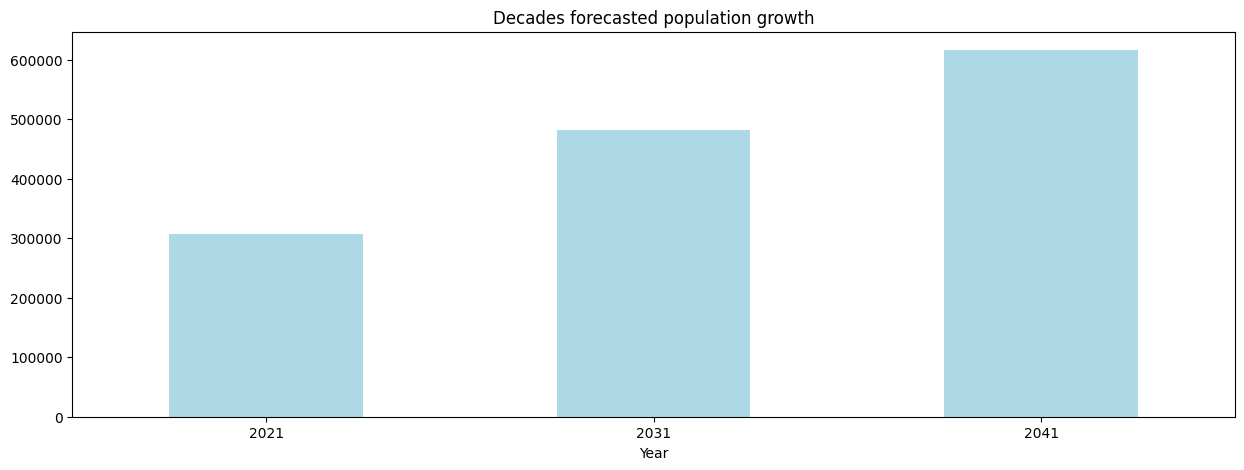

In [1166]:
df_growth = df_age.loc[df_age['Year'].isin([2021, 2031, 2041])]
df_growth.groupby('Year')['Value'].sum().plot(kind='bar', figsize=(15, 5), title='Decades forecasted population growth' , color='lightblue', rot=0)

In order to see how the economics are effected by the population growth, we also refer to the world GDP data and made a simple prediction. [World GDP Data: Kaggle](https://www.kaggle.com/datasets/zgrcemta/world-gdpgdp-gdp-per-capita-and-annual-growths)

In [1167]:
import numpy as np #linear algebra

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_squared_log_error


In [1168]:
world_data = pd.read_csv('data/countries of the world.csv', decimal=',')
world_data

Country                               Region  Population   
0       Afghanistan         ASIA (EX. NEAR EAST)             31056997  \
1           Albania   EASTERN EUROPE                          3581655   
2           Algeria   NORTHERN AFRICA                        32930091   
3    American Samoa   OCEANIA                                   57794   
4           Andorra   WESTERN EUROPE                            71201   
..               ...                                  ...         ...   
222       West Bank   NEAR EAST                               2460492   
223  Western Sahara   NORTHERN AFRICA                          273008   
224           Yemen   NEAR EAST                              21456188   
225          Zambia   SUB-SAHARAN AFRICA                     11502010   
226        Zimbabwe   SUB-SAHARAN AFRICA                     12236805   

     Area (sq. mi.)  Pop. Density (per sq. mi.)  Coastline (coast/area ratio)   
0            647500                        48.0                          0.00  \
1             28748                       124.6                          1.26   
2           2381740                        13.8                          0.04   
3               199                       290.4                         58.29   
4               468                       152.1                          0.00   
..              ...                         ...                           ...   
222            5860                       419.9                          0.00   
223          266000                         1.0                          0.42   
224          527970                        40.6                          0.36   
225          752614                        15.3                          0.00   
226          390580                        31.3                          0.00   

     Net migration  Infant mortality (per 1000 births)  GDP ($ per capita)   
0            23.06                              163.07               700.0  \
1            -4.93                               21.52              4500.0   
2            -0.39                               31.00              6000.0   
3           -20.71                                9.27              8000.0   
4             6.60                                4.05             19000.0   
..             ...                                 ...                 ...   
222           2.98                               19.62               800.0   
223            NaN                                 NaN                 NaN   
224           0.00                               61.50               800.0   
225           0.00                               88.29               800.0   
226           0.00                               67.69              1900.0   

     Literacy (%)  Phones (per 1000)  Arable (%)  Crops (%)  Other (%)   
0            36.0                3.2       12.13       0.22      87.65  \
1            86.5               71.2       21.09       4.42      74.49   
2            70.0               78.1        3.22       0.25      96.53   
3            97.0              259.5       10.00      15.00      75.00   
4           100.0              497.2        2.22       0.00      97.78   
..            ...                ...         ...        ...        ...   
222           NaN              145.2       16.90      18.97      64.13   
223           NaN                NaN        0.02       0.00      99.98   
224          50.2               37.2        2.78       0.24      96.98   
225          80.6                8.2        7.08       0.03      92.90   
226          90.7               26.8        8.32       0.34      91.34   

     Climate  Birthrate  Deathrate  Agriculture  Industry  Service  
0        1.0      46.60      20.34        0.380     0.240    0.380  
1        3.0      15.11       5.22        0.232     0.188    0.579  
2        1.0      17.14       4.61        0.101     0.600    0.298  
3        2.0      22.46       3.27          NaN       NaN    

In [1169]:
print(world_data.isnull().sum())

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64


There are some NaN values, therefore we need to fill in the missing data by simply using the median values of the region based on the assumption that the median value can reflect the reality instead of the average. However, for the Climate, we need to fill in the missing data by using the mode as the climate is a categorical feature.

In [1170]:
for col in world_data.columns.values:
    if world_data[col].isnull().sum() == 0:
        continue
    if col == 'Climate':
        guess_values = world_data.groupby('Region')['Climate'].apply(lambda x: x.mode().max())
    else:
        guess_values = world_data.groupby('Region')[col].median()
    for region in world_data['Region'].unique():
        world_data[col].loc[(world_data[col].isnull())&(world_data['Region']==region)] = guess_values[region]

In [1171]:
print(world_data.isnull().sum())

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         0
Infant mortality (per 1000 births)    0
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     0
Arable (%)                            0
Crops (%)                             0
Other (%)                             0
Climate                               0
Birthrate                             0
Deathrate                             0
Agriculture                           0
Industry                              0
Service                               0
dtype: int64


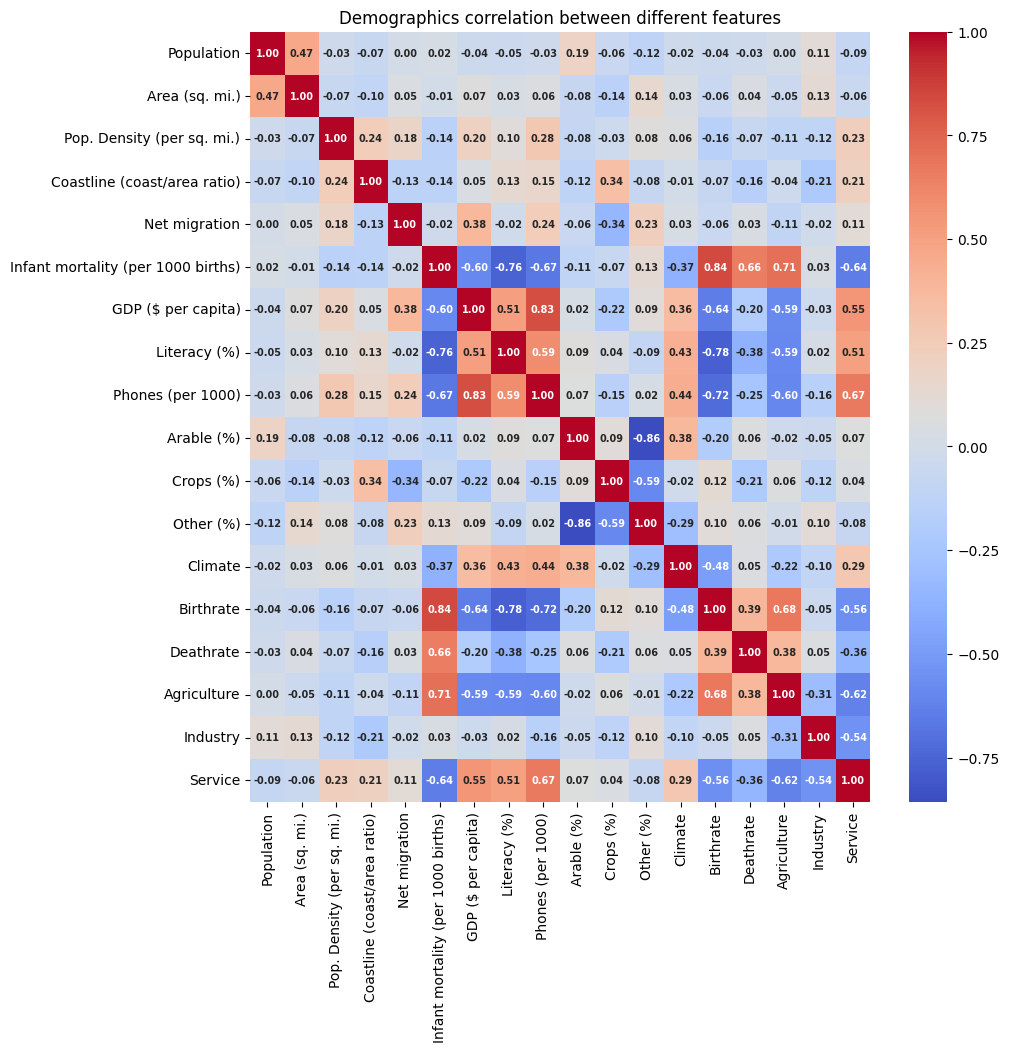

In [1172]:
plt.figure(figsize=(10,10))
sns.heatmap(data=world_data.iloc[:,2:].corr(),annot=True,fmt='.2f',cmap='coolwarm', 
            annot_kws={
                'fontsize': 7,
                'fontweight': 'bold'
            })
plt.title('Demographics correlation between different features')
plt.show()

Here we can see that the population has an obvious correlation with the Area (sq. mi.), which we will talk about in the next topic.

As mentioned above, we learned from the data that the elderly population will show a significantly increase in the future. It was no doubt that the CBD area is popular for the youngers, will the elderly people still prefer living in the city center?

In [1173]:
geoinfo = pd.read_csv('data/small_area_geo_info.csv')
geoinfo.rename(columns={'featurenam': 'Geography'}, inplace=True)
df_pop_area = pd.merge(df_age, geoinfo, on='Geography')

In [1174]:
df_pop_area = df_pop_area[df_pop_area['Age'].isin(['Age 65-69', 'Age 70-74', 'Age 75-79', 'Age 80-84', 'Age 85+'])]
df_pop_area.drop(['shape_area', 'shape_len'], axis=1, inplace=True)

In [1175]:
df_pop_area = df_pop_area[df_pop_area['Year'].isin([2041])]
df_pop_area['AreaTotal'] = df_pop_area.groupby('Geography')['Value'].transform('sum')

In [1176]:
df_pop_area['Lat'] = df_pop_area['Geo Point'].apply(lambda x: x.split(', ')[0])
df_pop_area['Lon'] = df_pop_area['Geo Point'].apply(lambda x: x.split(', ')[1])

df_pop_area['Lat'] = pd.to_numeric(df_pop_area['Lat'])
df_pop_area['Lon'] = pd.to_numeric(df_pop_area['Lon'])

fig = px.scatter_mapbox(df_pop_area, 
                        lat='Lat', 
                        lon='Lon', 
                        hover_name='Geography', 
                        hover_data=['AreaTotal'],
                        color='AreaTotal', 
                        opacity=0.8,
                        color_continuous_scale='Jet', 
                        size='AreaTotal',
                        zoom=11, title='Elderly Population Distribution by Small Area in 2041')

fig.update_layout(mapbox_style='open-street-map')
fig.update_layout(margin={'r': 0, 't': 40, 'l': 0, 'b': 0})

fig.show()

Some test with the GDP data for predicting the GDP growth in Australia. 

In [1177]:
gdp_data = pd.read_csv('data/GDP2022.csv', index_col=0)
gdp_data.columns.values

array(['Country Code', 'Indicator Name', 'Indicator Code', '1960', '1961',
       '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020', '2021', '2022'], dtype=object)

In [1178]:
gdp_data.drop(['Country Code', 'Indicator Name', 'Indicator Code', '2022'], axis=1, inplace=True)

In [1179]:
gdp_Aus = gdp_data[gdp_data.index == 'Australia']

gdp_Aus = gdp_Aus.T
gdp_Aus.dropna(inplace=True)
gdp_Aus

Country Name     Australia
1960          1.860567e+10
1961          1.968194e+10
1962          1.992160e+10
1963          2.153881e+10
1964          2.379998e+10
...                    ...
2017          1.326520e+12
2018          1.428290e+12
2019          1.392230e+12
2020          1.326900e+12
2021          1.552670e+12

[62 rows x 1 columns]

In [1180]:
X = pd.DataFrame(gdp_Aus.index, columns=['Year'])
X

Year
0   1960
1   1961
2   1962
3   1963
4   1964
..   ...
57  2017
58  2018
59  2019
60  2020
61  2021

[62 rows x 1 columns]

In [1181]:
X = pd.DataFrame(gdp_Aus.index, columns=['Year'])
y = gdp_Aus.iloc[:, 0]

X['Year'] = X['Year'].astype(int)

model = LinearRegression()
model.fit(X, y)

future_years = [2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041] 

X_pred = pd.DataFrame(index=future_years, columns=['Year'])
X_pred['Year'] = X_pred['Year'].fillna(X['Year'].max() + 1)

y_pred = model.predict(X_pred)

for year, gdp in zip(future_years, y_pred):
    print(f'Year: {year}, Predicted GDP Growth for Australia: {gdp}')

Year: 2022, Predicted GDP Growth for Australia: 1279433767041.3984
Year: 2023, Predicted GDP Growth for Australia: 1279433767041.3984
Year: 2024, Predicted GDP Growth for Australia: 1279433767041.3984
Year: 2025, Predicted GDP Growth for Australia: 1279433767041.3984
Year: 2026, Predicted GDP Growth for Australia: 1279433767041.3984
Year: 2027, Predicted GDP Growth for Australia: 1279433767041.3984
Year: 2028, Predicted GDP Growth for Australia: 1279433767041.3984
Year: 2029, Predicted GDP Growth for Australia: 1279433767041.3984
Year: 2030, Predicted GDP Growth for Australia: 1279433767041.3984
Year: 2031, Predicted GDP Growth for Australia: 1279433767041.3984
Year: 2032, Predicted GDP Growth for Australia: 1279433767041.3984
Year: 2033, Predicted GDP Growth for Australia: 1279433767041.3984
Year: 2034, Predicted GDP Growth for Australia: 1279433767041.3984
Year: 2035, Predicted GDP Growth for Australia: 1279433767041.3984
Year: 2036, Predicted GDP Growth for Australia: 1279433767041.

As the GDP growth are effected by many different factors, the simple linear regression is not convincing for used as a conclusion.

### Dwelling and floor space

In [1182]:
df_household = pd.read_csv('data/city-of-melbourne-dwellings-and-household-forecasts-by-small-area-2020-2040.csv')
df_floorspace = pd.read_csv('data/city-of-melbourne-floor-space-forecasts-by-small-area-2020-2040.csv')

<AxesSubplot: title={'center': 'Total Households by Year'}, xlabel='Year'>

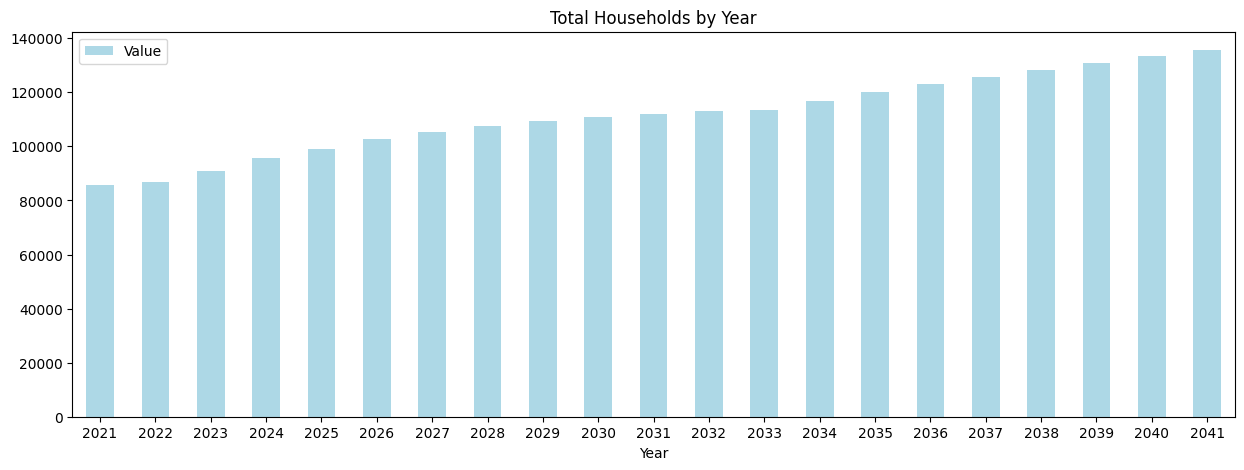

In [1184]:
df_household = df_household.drop(df_household[df_household['Geography'].isin(['City of Melbourne'])].index)
df_household = df_household.drop(df_household[df_household['Households'].isin(['Not applicable', 'Total households'])].index)
df_household.groupby(['Year']).sum().plot(kind='bar', y='Value', figsize=(15, 5), title='Total Households by Year', color='lightblue', rot=0)

In [1185]:
households_2021 = df_household[df_household['Year'] == 2021]['Value'].sum()
households_2041 = df_household[df_household['Year'] == 2041]['Value'].sum()

increase_rate = ((households_2041 - households_2021) / households_2021) * 100
increase_rate

58.02057723454086

In [1187]:
df_floorspace = df_floorspace.drop(df_floorspace[df_floorspace['Geography'].isin(['City of Melbourne'])].index)
df_floorspace = df_floorspace.drop(df_floorspace[df_floorspace['Industry Space Use'].isin(['Total residential floorspace'])].index)
df_floorspace = df_floorspace.drop(df_floorspace[df_floorspace['Industry Space Use'].isin(['Total employment floorspace'])].index)
df_floorspace

Geography  Year                             Category   
200                        Carlton  2022    Employment floorspace by industry  \
201                        Carlton  2025    Employment floorspace by industry   
202                        Carlton  2028    Employment floorspace by industry   
203                        Carlton  2021    Employment floorspace by industry   
204                        Carlton  2024    Employment floorspace by industry   
...                            ...   ...                                  ...   
9693  West Melbourne (Residential)  2034  Residential floorspace by space use   
9694  West Melbourne (Residential)  2036  Residential floorspace by space use   
9695  West Melbourne (Residential)  2037  Residential floorspace by space use   
9696  West Melbourne (Residential)  2038  Residential floorspace by space use   
9697  West Melbourne (Residential)  2039  Residential floorspace by space use   

              Industry Space Use   Value  
200                Accommodation  237222  
201                Accommodation  289338  
202                Accommodation  309942  
203   Admin and support services    2902  
204   Admin and support services    2830  
...                          ...     ...  
9693                       house  108085  
9694                       house  108085  
9695                       house  108085  
9696                       house  108085  
9697                       house  108085  

[8463 rows x 5 columns]

<AxesSubplot: title={'center': 'Total Floor Space by Year'}, xlabel='Year'>

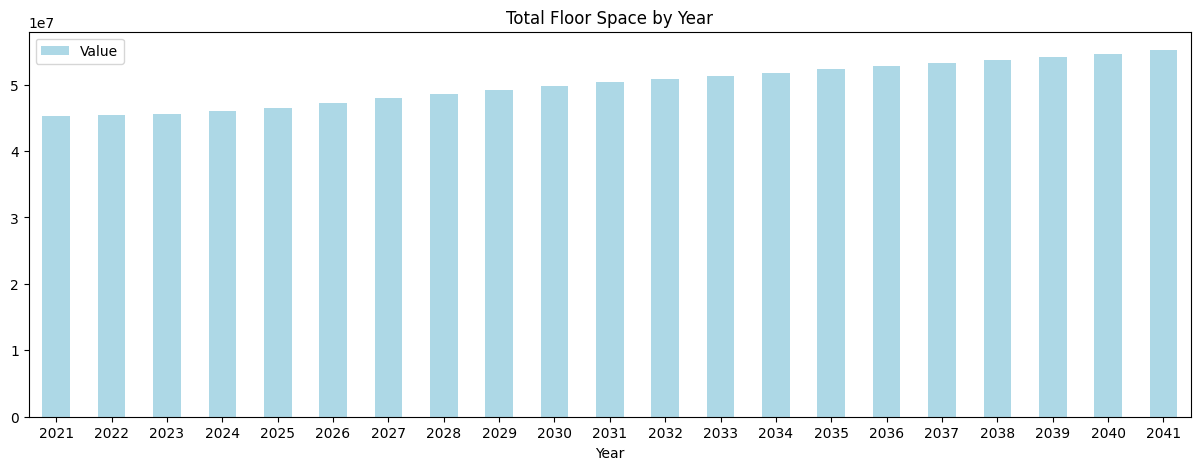

In [1188]:
df_floorspace.groupby(['Year']).sum().plot(kind='bar', y='Value', figsize=(15, 5), title='Total Floor Space by Year', color='lightblue', rot=0)

<AxesSubplot: title={'center': 'Total Floor Space by Industry'}, xlabel='Industry Space Use'>

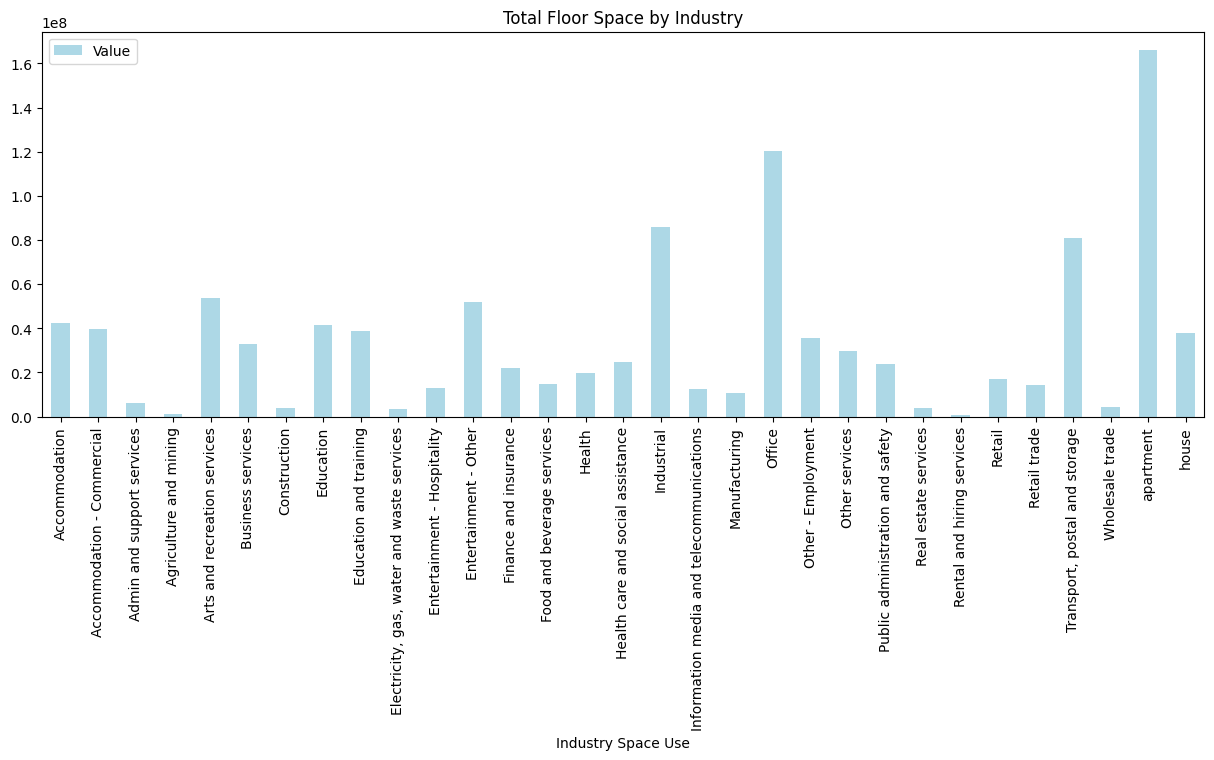

In [1189]:
df_floorspace.groupby(['Industry Space Use']).sum().plot(kind='bar', y='Value', figsize=(15, 5), title='Total Floor Space by Industry', color='lightblue')

Now in order to have an overview of the dwelling and floor space, we need to combine the data sets of dwelling and floor space.

In [1190]:
households_by_year = df_household.groupby(['Year']).sum()
households_by_year = households_by_year['Value'].to_frame().reset_index()

Year   Value
0   2021   85823
1   2022   86954
2   2023   90775
3   2024   95685
4   2025   99136
5   2026  102588
6   2027  105389
7   2028  107690
8   2029  109524
9   2030  110973
10  2031  112136
11  2032  112995
12  2033  113609
13  2034  116913
14  2035  120020
15  2036  122954
16  2037  125753
17  2038  128411
18  2039  130951
19  2040  133359
20  2041  135618

In [1191]:
floor_by_year = df_floorspace.groupby(['Year']).sum()
floor_by_year = floor_by_year['Value'].to_frame().reset_index()

Year     Value
0   2021  45300899
1   2022  45378810
2   2023  45623320
3   2024  46040733
4   2025  46519313
5   2026  47305712
6   2027  47983304
7   2028  48630201
8   2029  49235273
9   2030  49827904
10  2031  50400218
11  2032  50850664
12  2033  51231240
13  2034  51781188
14  2035  52331999
15  2036  52818285
16  2037  53276683
17  2038  53687357
18  2039  54119519
19  2040  54597999
20  2041  55206001

we also want to see the relationship to the population growth, therefore we need to combine the data set of population.

In [1192]:
df_age = df_age.groupby(['Year']).sum()
df_age = df_age['Value'].to_frame().reset_index()

Year     Value
0   2021  307332.0
1   2022  313141.0
2   2023  316231.0
3   2024  333640.0
4   2025  357561.0
5   2026  381974.0
6   2027  404734.0
7   2028  426106.0
8   2029  446127.0
9   2030  464919.0
10  2031  482773.0
11  2032  499547.0
12  2033  515404.0
13  2034  530363.0
14  2035  544489.0
15  2036  557919.0
16  2037  570742.0
17  2038  582998.0
18  2039  594659.0
19  2040  605816.0
20  2041  616384.0

In [1193]:
forecast_overview = pd.merge(households_by_year, floor_by_year, on='Year')
forecast_overview = pd.merge(forecast_overview, df_age, on='Year')

forecast_overview.rename(columns={'Value_x': 'Households', 'Value_y': 'Floor Space', 'Value': 'Population'}, inplace=True)

Year  Households  Floor Space  Population
0   2021       85823     45300899    307332.0
1   2022       86954     45378810    313141.0
2   2023       90775     45623320    316231.0
3   2024       95685     46040733    333640.0
4   2025       99136     46519313    357561.0
5   2026      102588     47305712    381974.0
6   2027      105389     47983304    404734.0
7   2028      107690     48630201    426106.0
8   2029      109524     49235273    446127.0
9   2030      110973     49827904    464919.0
10  2031      112136     50400218    482773.0
11  2032      112995     50850664    499547.0
12  2033      113609     51231240    515404.0
13  2034      116913     51781188    530363.0
14  2035      120020     52331999    544489.0
15  2036      122954     52818285    557919.0
16  2037      125753     53276683    570742.0
17  2038      128411     53687357    582998.0
18  2039      130951     54119519    594659.0
19  2040      133359     54597999    605816.0
20  2041      135618     55206001    616384.0

Before we plot them into one graph, it is obvious that the vaule are not in the same scale, therefore we need to normalize them.

In [1194]:
# Select the columns to normalize
columns_to_normalize = ['Households', 'Floor Space', 'Population']

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the selected columns
normalized_data = scaler.fit_transform(forecast_overview[columns_to_normalize])

# Create a new dataframe with the normalized values
df_normalized = pd.DataFrame(normalized_data, columns=columns_to_normalize)

# Concatenate the Year column with the normalized dataframe
df_normalized = pd.concat([forecast_overview['Year'], df_normalized], axis=1)

# Print the normalized dataframe
print(df_normalized)


    Year  Households  Floor Space  Population
0   2021    0.000000     0.000000    0.000000
1   2022    0.022713     0.007866    0.018796
2   2023    0.099448     0.032551    0.028795
3   2024    0.198052     0.074692    0.085125
4   2025    0.267356     0.123009    0.162526
5   2026    0.336680     0.202402    0.241519
6   2027    0.392931     0.270810    0.315164
7   2028    0.439140     0.336120    0.384317
8   2029    0.475971     0.397207    0.449099
9   2030    0.505071     0.457038    0.509904
10  2031    0.528427     0.514817    0.567675
11  2032    0.545677     0.560294    0.621950
12  2033    0.558008     0.598716    0.673259
13  2034    0.624360     0.654237    0.721662
14  2035    0.686756     0.709846    0.767369
15  2036    0.745677     0.758941    0.810825
16  2037    0.801888     0.805220    0.852316
17  2038    0.855267     0.846681    0.891973
18  2039    0.906276     0.890311    0.929704
19  2040    0.954634     0.938617    0.965805
20  2041    1.000000     1.000000 

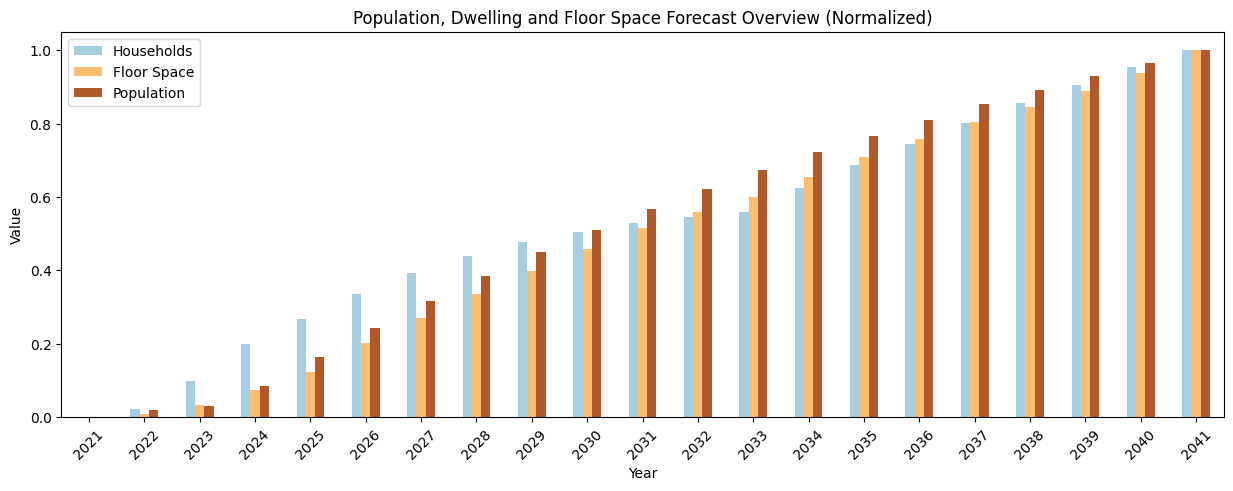

In [1195]:
df_normalized.plot(kind='bar', x='Year', figsize=(15, 5), title='Population, Dwelling and Floor Space Forecast Overview (Normalized)', rot=45, colormap='Paired')
plt.xlabel('Year')
plt.ylabel('Value')

plt.show()

In [1196]:
# Convert DataFrame to long format
df_long = pd.melt(df_normalized, id_vars='Year', var_name='Category', value_name='Value')

# Create the bar plot using Plotly Express
fig = px.bar(df_long, x='Year', y='Value', color='Category',
             title='Population, Dwelling and Floor Space Forecast Overview (Normalized)',
             labels={'Year': 'Year', 'Value': 'Value'}, barmode='group')

# Adjust the figure size
fig.update_layout(width=1000, height=500,
                  title_font_size=13)

# Show the plot
fig.show()

From the graph, we can see that the population growth is much faster than the dwelling and floor space growth. Households growth is even slower than the dwelling and floor space growth.

In order to see the trend of growth more directly, we visualize the same data in using bokeh.

In [1197]:
forecast_overview_viz = pd.merge(forecast_overview, df_normalized, on='Year')
forecast_overview_viz.rename(columns={'Households_x': 'Households', 'Floor Space_x': 'Floor_Space', 'Population_x': 'Population', 'Households_y': 'Households (Normalized)', 'Floor Space_y': 'Floor_Space (Normalized)', 'Population_y': 'Population (Normalized)'}, inplace=True)

In [1198]:
source = models.ColumnDataSource(forecast_overview_viz)

p1 = plotting.figure(title='Melbourne Forecast Overview (Normalized)', x_axis_label='Year', y_axis_label='Population', width=800, height=600)

plot1 =p1.line(x='Year', y='Population (Normalized)', source=source, legend_label='Population', line_width=3, color=Spectral11[1])
plot2 =p1.line(x='Year', y='Households (Normalized)', source=source, legend_label='Households', line_width=3, color=Spectral11[3])
plot3 =p1.line(x='Year', y='Floor_Space (Normalized)', source=source, legend_label='Floor_Space', line_width=3, color=Spectral11[5])

p1.add_tools(models.HoverTool(renderers=[plot1], tooltips=[('Year', '@Year'), ('Population', '@Population')]))
p1.add_tools(models.HoverTool(renderers=[plot2], tooltips=[('Year', '@Year'), ('Households', '@Households')]))
p1.add_tools(models.HoverTool(renderers=[plot3], tooltips=[('Year', '@Year'), ('Floor Space', '@Floor_Space sqm')]))

p1.legend.location = 'top_left'
p1.legend.background_fill_alpha = 0.25
p1.legend.background_fill_color = 'darkgray'
p1.legend.border_line_alpha = 0
p1.title.align = 'center'

show(p1)

From the graph, we could see that around 2030, the population growth will exceed the households growth, which reveals that there can be a housing shortage in the future.

In [1199]:
df_household.rename(columns={'Value': 'Number of Households'}, inplace=True)
df_household_area = df_household.groupby(['Year', 'Geography']).sum()
df_household_area.drop(columns=['Households', 'Category'], inplace=True)
df_household_area.reset_index(inplace=True)

In [1200]:
df_household_area = df_household_area.pivot(index='Year', columns='Geography', values='Number of Households')

In [1201]:
source = models.ColumnDataSource(df_household_area)

areas = df_household['Geography'].unique().tolist()
years = df_household['Year'].unique().tolist()
years = years.sort()

p2 = figure(title='Melbourne Households Forecast by Small Area', x_axis_label='Year', y_axis_label='Number of Households', width=800, height=600)

bar = {}
for indx, i in enumerate(areas):
    bar[i] = p2.vbar(x="Year", top=i, width=0.3, 
                    source=source, muted_alpha=0.2, muted=False, color=Category20b[14][indx])

legend = Legend(items=[(x, [bar[x]]) for x in areas], location=(0, -30))
p2.add_layout(legend, 'right')

p2.legend.background_fill_alpha = 0.25
p2.legend.border_line_alpha = 0
p2.title.align = 'center'
p2.legend.click_policy = 'hide'

show(p2)

In [1202]:
df_floorspace.rename(columns={'Value': 'Amount of Floor Space'}, inplace=True)
df_floorspace_area = df_floorspace.groupby(['Year', 'Geography']).sum()
df_floorspace_area.drop(columns=['Industry Space Use', 'Category'], inplace=True)
df_floorspace_area.reset_index(inplace=True)

In [1203]:
df_floorspace_area = df_floorspace_area.pivot(index='Year', columns='Geography', values='Amount of Floor Space')

In [1204]:
source = models.ColumnDataSource(df_floorspace_area)

areas = df_floorspace['Geography'].unique().tolist()
years = df_floorspace['Year'].unique().tolist()
years = years.sort()

p3 = figure(title='Melbourne Floor Space Forecast by Small Area', x_axis_label='Year', y_axis_label='Amount of Floor Space', width=800, height=600)

bar = {}
for indx, i in enumerate(areas):
    bar[i] = p3.vbar(x="Year", top=i, width=0.3, 
                    source=source, muted_alpha=0.2, muted=False, color=Category20b[14][indx])

legend = Legend(items=[(x, [bar[x]]) for x in areas], location=(0, -30))
p3.add_layout(legend, 'right')

p3.legend.background_fill_alpha = 0.25
p3.legend.border_line_alpha = 0
p3.title.align = 'center'
p3.legend.click_policy = 'hide'

show(p3)

In [1205]:
tab1 = TabPanel(child=p1,title="Forecast Overview")
tab2 = TabPanel(child=p2,title="Households by Small Area")
tab3 = TabPanel(child=p3,title="Floor Space by Small Area")

tabs = Tabs(tabs=[tab1, tab2, tab3])

curdoc().add_root(tabs)

show(tabs)

In [1206]:
households_geo = df_household.groupby(['Year', 'Geography']).sum()
households_geo.drop(columns=['Category', 'Households'], inplace=True)

households_geo.reset_index(inplace=True)
households_geo

Year                     Geography  Number of Households
0    2021                       Carlton                 11358
1    2021                     Docklands                  8582
2    2021                East Melbourne                  2894
3    2021                    Kensington                  5067
4    2021               Melbourne (CBD)                 26765
..    ...                           ...                   ...
268  2041                Port Melbourne                  1339
269  2041                   South Yarra                  2813
270  2041                     Southbank                 18194
271  2041   West Melbourne (Industrial)                     0
272  2041  West Melbourne (Residential)                  6612

[273 rows x 3 columns]

In [1207]:
households_geo['Year'].astype('int64')
households_geo = households_geo.sort_values(by=['Year'], ascending=True)

In [1208]:
geoinfo = pd.read_csv('data/small_area_geo_info.csv')
geoinfo.rename(columns={'featurenam': 'Geography'}, inplace=True)

Geo Point   
0     -37.79152998205382, 144.9204996881507  \
1   -37.808460189256294, 144.94942867521925   
2    -37.81381109987871, 144.96291513859617   
3   -37.828764031547315, 144.97838992382978   
4    -37.809621301586795, 144.9221537804208   
5     -37.81851829412262, 144.9416850851487   
6      -37.79601167728975, 144.966376105915   
7    -37.79844895689088, 144.94506274103145   
8    -37.83183174511404, 144.91223395712774   
9     -37.78711656492933, 144.9515603312268   
10   -37.82529018627908, 144.96176162794978   
11   -37.83760704949379, 144.98292521995853   
12   -37.814581164837946, 144.9825008488323   

                                            Geo Shape   
0   {"coordinates": [[[[144.936867787351, -37.7888...  \
1   {"coordinates": [[[[144.95143788598978, -37.81...   
2   {"coordinates": [[[[144.95143788598978, -37.81...   
3   {"coordinates": [[[[144.98502208625717, -37.84...   
4   {"coordinates": [[[[144.91999182740727, -37.81...   
5   {"coordinates": [[[[144.95143788598978, -37.81...   
6   {"coordinates": [[[[144.9732217743585, -37.807...   
7   {"coordinates": [[[[144.95732229939304, -37.80...   
8   {"coordinates": [[[[144.906064021575, -37.8222...   
9   {"coordinates": [[[[144.94036533536232, -37.78...   
10  {"coordinates": [[[[144.95599687351128, -37.82...   
11  {"coordinates": [[[[144.98502208625717, -37.84...   
12  {"coordinates": [[[[144.9732217743585, -37.807...   

                       Geography    shape_area     shape_len  
0                     Kensington  3.808797e+06   9407.055421  
1   West Melbourne (Residential)  8.600547e+05   4031.467993  
2                Melbourne (CBD)  2.485905e+06   7112.609871  
3          Melbourne (Remainder)  2.668301e+06  11399.608246  
4    West Melbourne (Industrial)  5.917883e+06  11793.960449  
5                      Docklands  2.856029e+06   9588.247785  
6                        Carlton  2.724821e+06   9914.977304  
7                North Melbourne  2.408377e+06   7546.649191  
8                 Port Melbourne  5.470093e+06  15117.723398  
9                      Parkville  4.050997e+06   9224.569397  
10                     Southbank  1.596010e+06   6012.377239  
11                   South Yarra  1.057773e+06   5424.136446  
12                East Melbourne  1.909073e+06   6557.914249

In [1209]:
map_households = pd.merge(households_geo, geoinfo, on='Geography')

Year        Geography  Number of Households   
0    2021          Carlton                 11358  \
1    2022          Carlton                 11509   
2    2023          Carlton                 12026   
3    2024          Carlton                 12591   
4    2025          Carlton                 13047   
..    ...              ...                   ...   
268  2037  North Melbourne                 13119   
269  2038  North Melbourne                 13807   
270  2039  North Melbourne                 14458   
271  2040  North Melbourne                 14874   
272  2041  North Melbourne                 15447   

                                  Geo Point   
0      -37.79601167728975, 144.966376105915  \
1      -37.79601167728975, 144.966376105915   
2      -37.79601167728975, 144.966376105915   
3      -37.79601167728975, 144.966376105915   
4      -37.79601167728975, 144.966376105915   
..                                      ...   
268  -37.79844895689088, 144.94506274103145   
269  -37.79844895689088, 144.94506274103145   
270  -37.79844895689088, 144.94506274103145   
271  -37.79844895689088, 144.94506274103145   
272  -37.79844895689088, 144.94506274103145   

                                             Geo Shape    shape_area   
0    {"coordinates": [[[[144.9732217743585, -37.807...  2.724821e+06  \
1    {"coordinates": [[[[144.9732217743585, -37.807...  2.724821e+06   
2    {"coordinates": [[[[144.9732217743585, -37.807...  2.724821e+06   
3    {"coordinates": [[[[144.9732217743585, -37.807...  2.724821e+06   
4    {"coordinates": [[[[144.9732217743585, -37.807...  2.724821e+06   
..                                                 ...           ...   
268  {"coordinates": [[[[144.95732229939304, -37.80...  2.408377e+06   
269  {"coordinates": [[[[144.95732229939304, -37.80...  2.408377e+06   
270  {"coordinates": [[[[144.95732229939304, -37.80...  2.408377e+06   
271  {"coordinates": [[[[144.95732229939304, -37.80...  2.408377e+06   
272  {"coordinates": [[[[144.95732229939304, -37.80...  2.408377e+06   

       shape_len  
0    9914.977304  
1    9914.977304  
2    9914.977304  
3    9914.977304  
4    9914.977304  
..           ...  
268  7546.649191  
269  7546.649191  
270  7546.649191  
271  7546.649191  
272  7546.649191  

[273 rows x 7 columns]

In [1210]:
map_households['Lat'] = map_households['Geo Point'].apply(lambda x: x.split(', ')[0])
map_households['Lon'] = map_households['Geo Point'].apply(lambda x: x.split(', ')[1])

map_households['Lat'] = pd.to_numeric(map_households['Lat'])
map_households['Lon'] = pd.to_numeric(map_households['Lon'])

In [1211]:
fig = px.choropleth_mapbox(map_households, 
                        locations= 'Geo Point',hover_name="Geography", hover_data=["Number of Households"], color="Number of Households")

fig.update_layout(margin=dict(l=0, r=0, t=0, b=0))
fig.show()

### Employment amd Jobs

(More details in sandbox)

In [1214]:
#| echo: false
import polars as pl
import matplotlib.pyplot as plt
import matplotx
import itables.options as opt
import folium
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
import polars as pl
from bokeh.io import output_file, show
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure
from bokeh.plotting import show as b_show
from bokeh.models import DataTable, TableColumn, Tabs, TabPanel
from datetime import date, time
from polars.dataframe import DataFrame
from rich import print
from pathlib import Path
from typing import Protocol
from dataclasses import dataclass
from scipy import stats
from itables import show as i_show
from itables import init_notebook_mode

import bokeh.io
from bokeh.resources import INLINE
from bokeh import *

plt.style.use(matplotx.styles.dufte)

@dataclass
class VizData:
    title: str
    ylabel: str
    xlabel: str
    df: DataFrame = None

jobs = pl.read_csv('data/jobs_forecast.csv', ignore_errors=True, try_parse_dates=True)
jobs_industry = jobs.filter(pl.col('Category') == 'Jobs by industry')
jobs_space = jobs.filter(pl.col('Category') == 'Jobs by space use')

opt.css = """
.itables { margin-top: 15px; margin-bottom: 20px;}
"""
init_notebook_mode(all_interactive=False)

<IPython.core.display.Javascript object>

In [1215]:
# Create a map centered on Melbourne
melbourne_map = folium.Map(location=[-37.8136, 144.9631], zoom_start=13)

# Add a marker for Melbourne
# folium.Marker([-37.8136, 144.9631], popup='Melbourne').add_to(melbourne_map)

# Melbourne CBD coordinates
cbd_latitude = -37.8136
cbd_longitude = 144.9631

# Locations and their coordinates
locations = [
    ("Parkville", -37.778790, 144.942517),
    ("Kensington", -37.794152, 144.927635),
    ("Carlton", -37.800744, 144.966970),
    ("Docklands", -37.818903, 144.947014),
    ("South Bank", -37.823791, 144.962586),
    ("Port Melbourne", -37.836744, 144.928359),
    ("South Yarra", -37.839483, 144.995654),
    ("Torah", -37.841697, 145.013976)
]

# Create a map centered around Melbourne CBD
m = folium.Map(location=[cbd_latitude, cbd_longitude], zoom_start=14)

# Add markers for each location
for location in locations:
    name, latitude, longitude = location
    folium.Marker(location=[latitude, longitude], popup=name).add_to(melbourne_map)
melbourne_map
#melbourne_map.save("melbourne_map.html")

In [1216]:
grouped = jobs_industry.filter(pl.col('Industry Space Use') != 'Total jobs').groupby(['Geography', 'Industry Space Use'], maintain_order=True).agg([pl.col('Value').mean()]).sort('Value', descending=True).limit(8)
i_show(grouped)

In [1221]:
# src: https://app.remplan.com.au/melbourne-lga/economy/trends/jobs?state=GLZrFN!az4VClkNKSYeGD6Uvqea6f0c4I6ZouPIWIKJhGI8hxx7AUwzL
jobs_historic = pl.read_csv('data/melbourne-jobs-historically.csv', separator=';')
q = jobs_historic.sort('2021', descending=False)
q.filter(pl.col('Options').is_in(['Professional, Scientific and Technical Services',
                         'Financial and Insurance Services',
                         'Education and Training',
                         'Health Care and Social Assistance',
                         'Accommodation and Food Services']))

fig = go.Figure()
fig.add_trace(go.Bar(
    y=q['Options'],
    x=q['2021'],
    error_x=dict(type='data', array=q['2021'] - q['2016']),
    orientation='h'
))

fig.update_layout(
    title='Employments back in 2016 and 2021',
    xaxis_title='Employments',
    yaxis_title=None,
    yaxis=dict(autorange='reversed')
)

fig.show()

FileNotFoundError: No such file or directory: ./data/melbourne-jobs-historically.csv

In [ ]:
jobs = pl.read_csv('data/jobs_forecast.csv', ignore_errors=True, try_parse_dates=True)
jobs.columns
jobs.shape
jobs.describe()

jobs['Category'].unique()
list(jobs['Industry Space Use'].unique())

jobs_industry = jobs.filter(pl.col('Category') == 'Jobs by industry')

q = (jobs_industry
     .filter(pl.col('Industry Space Use') == 'Total jobs')
     .sort('Year')
     .groupby(['Geography', 'Year'], maintain_order=True)
     .agg(pl.sum('Value'))
     .with_columns([
         pl.col('Value').log().alias('Value_log'),
         pl.col('Year').cast(pl.UInt32)
     ]))
set(q['Geography'].unique())
q = q.filter(pl.col('Geography').is_in(['Melbourne (CBD)', 'Carlton', 'Kensington', 'Parkville', 'South Yarra', 'Southbank']))

sns.relplot(q, x='Year', y='Value', hue="Geography", kind="line")
plt.title("Job forecasts for areas")
plt.ylabel('Jobs')
plt.xlabel('Year')
plt.show()

In [ ]:
jobs = pl.read_csv('../data/jobs_forecast.csv', ignore_errors=True, try_parse_dates=True)

jobs_industry = jobs.filter(pl.col('Category') == 'Jobs by industry')
q = jobs_industry.filter(pl.col('Geography').is_in(['Melbourne (CBD)', 'Carlton', 'Kensington', 'Parkville', 'South Yarra', 'Southbank']))

finance_ranks = q.filter(pl.col('Industry Space Use') == 'Finance and insurance').filter(pl.col('Year') <= 2025).with_columns(pl.col('Value').rank().alias('Rank')).sort('Rank', descending=True).filter(pl.col('Year') == 2025).limit(5)
finance_ranks[['Geography', 'Year', 'Rank']].limit(5)

healthcare_ranks = q.filter(pl.col('Industry Space Use') == 'Health care and social assistance').filter(pl.col('Year') <= 2025).with_columns(pl.col('Value').rank().alias('Rank')).sort('Rank', descending=True).filter(pl.col('Year') == 2025).limit(5)
healthcare_ranks[['Geography', 'Year', 'Rank']].limit(5)

education_ranks = q.filter(pl.col('Industry Space Use') == 'Education and training').filter(pl.col('Year') <= 2025).with_columns(pl.col('Value').rank().alias('Rank')).sort('Rank', descending=True).filter(pl.col('Year') == 2025).limit(5)

# Create ColumnDataSource for each data frame
finance_source = ColumnDataSource(finance_ranks[['Geography', 'Year', 'Rank']].to_pandas())
healthcare_source = ColumnDataSource(healthcare_ranks[['Geography', 'Year', 'Rank']].to_pandas())
education_source = ColumnDataSource(education_ranks[['Geography', 'Year', 'Rank']].to_pandas())

# Create DataTables for each data frame
finance_table = DataTable(
    source=finance_source,
    columns=[TableColumn(field='Geography', title='Geography'),
             TableColumn(field='Year', title='Year'),
             TableColumn(field='Rank', title='Rank')],
    width=400, height=200,
    index_position=-1  # Hide index column
)

healthcare_table = DataTable(
    source=healthcare_source,
    columns=[TableColumn(field='Geography', title='Geography'),
             TableColumn(field='Year', title='Year'),
             TableColumn(field='Rank', title='Rank')],
    width=400, height=200,
    index_position=-1  # Hide index column
)

education_table = DataTable(
    source=education_source,
    columns=[TableColumn(field='Geography', title='Geography'),
             TableColumn(field='Year', title='Year'),
             TableColumn(field='Rank', title='Rank')],
    width=400, height=200,
    index_position=-1  # Hide index column
)

# Create panels for each table
finance_panel = TabPanel(child=finance_table, title='Finance')
healthcare_panel = TabPanel(child=healthcare_table, title='Healthcare')
education_panel = TabPanel(child=education_table, title='Education')

# Create tabs layout
tabs = Tabs(tabs=[finance_panel, healthcare_panel, education_panel])
b_show(tabs)

In [ ]:
jobs = pl.read_csv('../data/jobs_forecast.csv', ignore_errors=True, try_parse_dates=True)

jobs_industry = jobs.filter(pl.col('Category') == 'Jobs by industry')
q = jobs_industry.filter(pl.col('Geography').is_in(['Melbourne (CBD)', 'Carlton', 'Kensington', 'Parkville', 'South Yarra', 'Southbank']))

finance_ranks = q.filter(pl.col('Industry Space Use') == 'Finance and insurance').filter(pl.col('Year') <= 2035).with_columns(pl.col('Value').rank().alias('Rank')).sort('Rank', descending=True).filter(pl.col('Year') == 2035).limit(5)
finance_ranks[['Geography', 'Year', 'Rank']].limit(5)

healthcare_ranks = q.filter(pl.col('Industry Space Use') == 'Health care and social assistance').filter(pl.col('Year') <= 2035).with_columns(pl.col('Value').rank().alias('Rank')).sort('Rank', descending=True).filter(pl.col('Year') == 2035).limit(5)
healthcare_ranks[['Geography', 'Year', 'Rank']].limit(5)

education_ranks = q.filter(pl.col('Industry Space Use') == 'Education and training').filter(pl.col('Year') <= 2035).with_columns(pl.col('Value').rank().alias('Rank')).sort('Rank', descending=True).filter(pl.col('Year') == 2035).limit(5)

# Create ColumnDataSource for each data frame
finance_source = ColumnDataSource(finance_ranks[['Geography', 'Year', 'Rank']].to_pandas())
healthcare_source = ColumnDataSource(healthcare_ranks[['Geography', 'Year', 'Rank']].to_pandas())
education_source = ColumnDataSource(education_ranks[['Geography', 'Year', 'Rank']].to_pandas())

# Create DataTables for each data frame
finance_table = DataTable(
    source=finance_source,
    columns=[TableColumn(field='Geography', title='Geography'),
             TableColumn(field='Year', title='Year'),
             TableColumn(field='Rank', title='Rank')],
    width=400, height=200,
    index_position=-1  # Hide index column
)

healthcare_table = DataTable(
    source=healthcare_source,
    columns=[TableColumn(field='Geography', title='Geography'),
             TableColumn(field='Year', title='Year'),
             TableColumn(field='Rank', title='Rank')],
    width=400, height=200,
    index_position=-1  # Hide index column
)

education_table = DataTable(
    source=education_source,
    columns=[TableColumn(field='Geography', title='Geography'),
             TableColumn(field='Year', title='Year'),
             TableColumn(field='Rank', title='Rank')],
    width=400, height=200,
    index_position=-1  # Hide index column
)

# Create panels for each table
finance_panel = TabPanel(child=finance_table, title='Finance')
healthcare_panel = TabPanel(child=healthcare_table, title='Healthcare')
education_panel = TabPanel(child=education_table, title='Education')

# Create tabs layout
tabs = Tabs(tabs=[finance_panel, healthcare_panel, education_panel])
b_show(tabs)

In [ ]:
jobs = pl.read_csv('../data/jobs_forecast.csv', ignore_errors=True, try_parse_dates=True)
jobs_industry = jobs.filter(pl.col('Category') == 'Jobs by industry').sort('Year')
jobs_industry = jobs_industry.filter(pl.col('Geography') == 'City of Melbourne')
jobs_industry = jobs_industry.filter(pl.col('Industry Space Use') == 'Finance and insurance')
#jobs_industry['Year'].max()

population = pl.read_csv('../data/population_forecast.csv', ignore_errors=True, try_parse_dates=True)
population = population.filter(pl.col('Geography') == 'City of Melbourne')
population = population.filter(pl.col('Gender') == 'Female')
# population = population.filter(pl.col('Age') == 'Average age')
population = population.filter(pl.col('Age') == 'Age 20-24')

joined = jobs_industry.join(population, on='Year', suffix='_population')
joined = joined.rename({"Value": "Jobs", "Value_population": "Population"})

corr = joined[['Year', 'Jobs', 'Population']]

f, ax = plt.subplots(figsize=(8, 5))

sns.heatmap(corr[['Year', 'Jobs', 'Population']].corr(), annot=True) 

plt.title('Correlation matrix', size=12)
ax.set_xticklabels(list(corr[['Year', 'Jobs', 'Population']].columns), size=12, rotation=90)
ax.set_yticklabels(list(corr[['Year', 'Jobs', 'Population']].columns), size=12, rotation=0)
plt.show()

## 4. Genre

> In our story, we will bring the narrative data story by applying the **Website Magazine Style**, as it contains both descriptive information and visualization, which could create a sense of comfort and familiarity to the readers. 

Which tools did you use from each of the 3 categories of Visual Narrative (Figure 7 in Segal and Heer). Why?

> For Visual Narrative, we used the following categories with the purpose listed:
> - Progress Bar/Timebar: showing the values of population changes, the numbers of households and jobs changing over years in the future, indicating the trend of city growth.
> - Zooming: used in the geograhical data visualization, in order to provide readers the possibility of zooming in the map to see the connections from locations.
> - Feature distinction: by distinguish the features by applying legends, readers are able to look into the categories they are mostly interested in.

Which tools did you use from each of the 3 categories of Narrative Structure (Figure 7 in Segal and Heer). Why?

>  In a magazine style data narrative, it is common to use **Annotations, Accompanying Article, Introductory Text and Summary** as the narrative structure.
> - Annotations: it allows more detailed numbers displayed on the visualizations, providing the transparency of data to the readers.
> - Accompanying article: there are some certified articles providing supplementary materials for readers to dive into different aspects regarding the data.
> - Introductory Text and Summary: providing a abstract overview of the content of the data story.

## 5. Visualizations

Explain the visualizations you've chosen. Why are they right for the story you want to tell?

> **The visualizations are rendered in Part4. acompanied in data analysis**
> 
> We utilized various visualization techniques, including bar charts, maps, line charts, tables, relational plots, and heatmaps, to present the data for different purposes.

- Bar charts: These charts provided a straightforward overview of how the population, households, floor space, and jobs change over time. They emphasized the growth trends for future years as forecasted data.

- Maps: By incorporating maps, we were able to showcase the spatial distribution of data and leverage the concept of location. For instance, we used maps to represent the population distribution across different small areas in Melbourne, which helped us identify current and future development areas.

- Line charts: Line charts facilitated easy comparison of growth rates and trends among different groups, such as age groups and areas. They were particularly effective for visualizing forecasted data.

- Tables: Tables presented the data in a direct and intuitive manner, allowing us to showcase specific numerical values within distinct categories.

- Relational plots: These plots highlighted clusters and groups within the data and supported statistical analysis to explore relationships and patterns.

- Heatmaps: Heatmaps provided visual cues for correlations among different features. They enabled us to quickly grasp the relative importance of population, jobs, and years in Melbourne.

- By utilizing these visualization techniques, we were able to present the data effectively, cater to different analytical needs, and enhance the understanding and insights gained from the data.

## 6. Discussion

What went well?

- Diversity of data visualization: As mentioned in Part5, we applied different forms of data visialization to represent our data story, which can bring the readers an experience of exploring the data from different perspectives.
- Webpage: we used [Quarto](https://quarto.org/) for publishing our story, which was a good experience of presenting the data. It provides the flexibility and good visualization on the webpage, in the meanwhile allowing readers to read the code by expanding the visualizations.
- Collaboration: We had an overall good collaboration of doing this project, and clear distribution of work.
- Interesting topic: The city data of Melbourne was interesting allowing us get to know better about the city.

What is still missing? What could be improved?, Why?

We tried to do some machine learning to predict the GDP growth in Australia, in order to get the insights of the correlation between population expanding and the GDP growth. However due to time limitation, we couldn't find a supportive dataset to make the prediction as GDP is affecting by many different reality factors.

The visualization for maps can be improved to show the difference as area blocks. Currently we used the geographical location as scatters to represent the concentration of population and jobs, however was not able to show the boundaries among different areas. Therefore, there can be some improvements on the map representation.

For the analysis, since the topic was very broad, we had difficulties to drill down to one specific story 

## 7. Contributions

We had both contributed to the communication and discussion about the data visualizations and data story. In general the workload were equally distributed, while Benjamin (s184198) had the focus on building the webpage and the data analysing of Melbourne employment and jobs, and Xinyi (s212620) had the focus on data analysing for population, households and floor space. Both of us contributed in the explainary notebook.

## 8. References

- [City of Melbourne Population and Jobs Forecasts 2021-2041 Summary report 2022](chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://www.melbourne.vic.gov.au/SiteCollectionDocuments/forecasts-summary-report.pdf)
- [Narrative Visualization: Telling Stories with Data, Edward Segel and Jeffrey Heer](chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/http://vis.stanford.edu/files/2010-Narrative-InfoVis.pdf)